<a href="https://colab.research.google.com/github/GyanendraChaubey/TransferLearningPOC/blob/main/CNN_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

1. Train this model (10 classes)
2. Try Transfer learning by changing the last layer to classify no. as even and odd (2 classes)

In [ ]:
#Import Necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
X_train_full[0].shape

(28, 28)

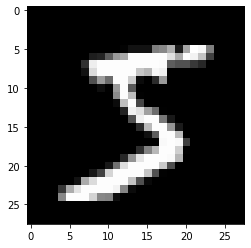

In [ ]:
plt.imshow(X_train_full[0], cmap="gray")

In [ ]:
y_train_full[0]

5

In [ ]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test=X_test/255


In [ ]:
CLASSES = len(np.unique(y_train))
CLASSES

10

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
np.expand_dims(X_train, -1).shape

(55000, 28, 28, 1)

In [ ]:
np.expand_dims(X_train, -2).shape

(55000, 28, 1, 28)

In [ ]:
np.expand_dims(X_train, -3).shape

(55000, 1, 28, 28)

In [ ]:
X_train_CNN = np.expand_dims(X_train, -1)
X_test_CNN = np.expand_dims(X_test, -1)
X_valid_CNN = np.expand_dims(X_valid, -1)

In [ ]:
X_train_CNN.shape

(55000, 28, 28, 1)

In [ ]:
X_train_CNN[0].shape

(28, 28, 1)

#Building Basic CNN Architecture or Pretrained CNN Model

In [ ]:
input_shape=(28,28,1) # (row, col, channels)
LAYERS = [
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation="softmax")
]

In [ ]:
CNN_model = tf.keras.Sequential(
    LAYERS
)

In [ ]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ["accuracy"]

CNN_model.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZERS, metrics=METRICS)

In [ ]:
EPOCHS= 10

VALIDATION = (X_valid, y_valid)

history = CNN_model.fit(
    X_train, 
    y_train,
    epochs=EPOCHS,
    validation_data=VALIDATION

)

Epoch 1/10
1719/1719 [==============================] - 76s 43ms/step - loss: 0.6227 - accuracy: 0.8255 - val_loss: 0.2041 - val_accuracy: 0.9430
Epoch 2/10
1719/1719 [==============================] - 49s 29ms/step - loss: 0.1775 - accuracy: 0.9481 - val_loss: 0.1329 - val_accuracy: 0.9608
Epoch 3/10
1719/1719 [==============================] - 52s 30ms/step - loss: 0.1256 - accuracy: 0.9624 - val_loss: 0.1079 - val_accuracy: 0.9696
Epoch 4/10
1719/1719 [==============================] - 52s 30ms/step - loss: 0.1017 - accuracy: 0.9695 - val_loss: 0.0883 - val_accuracy: 0.9742
Epoch 5/10
1719/1719 [==============================] - 52s 30ms/step - loss: 0.0876 - accuracy: 0.9736 - val_loss: 0.0860 - val_accuracy: 0.9740
Epoch 6/10
1719/1719 [==============================] - 53s 31ms/step - loss: 0.0783 - accuracy: 0.9760 - val_loss: 0.0729 - val_accuracy: 0.9786
Epoch 7/10
1719/1719 [==============================] - 51s 30ms/step - loss: 0.0709 - accuracy: 0.9785 - val_loss: 0.0713 -

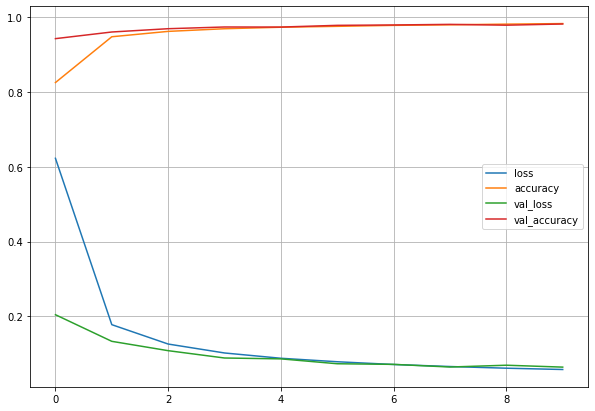

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [ ]:
CNN_model.save("mnist_full.h5")

In [ ]:
X_new = X_test[:3]

y_prob =CNN_model.predict(X_new)
y_prob

array([[7.94542885e-08, 5.38022853e-08, 1.03284052e-04, 2.06484783e-05,
        3.12035337e-12, 6.18080209e-09, 2.11547143e-13, 9.99871731e-01,
        6.92167177e-08, 4.04929096e-06],
       [2.02931969e-05, 5.31304220e-04, 9.99439895e-01, 7.60403964e-07,
        2.19945901e-13, 1.55593538e-10, 4.72929969e-06, 1.21646096e-12,
        2.94745905e-06, 3.57123490e-15],
       [2.57714419e-05, 9.99090195e-01, 8.44269525e-05, 8.61655190e-06,
        2.46255338e-04, 1.11541510e-06, 1.59507734e-04, 1.13299546e-04,
        2.68449570e-04, 2.42911688e-06]], dtype=float32)

In [ ]:
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.001, 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

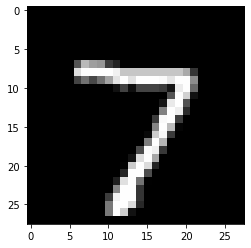

In [ ]:
plt.imshow(X_new[0], cmap="gray")

In [ ]:
Y_pred = np.argmax(y_prob, axis=1)
Y_pred

array([7, 2, 1])

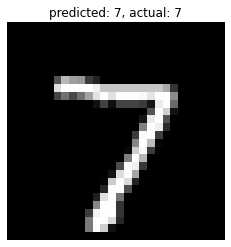

------------------------------------------------------------


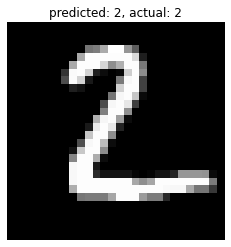

------------------------------------------------------------


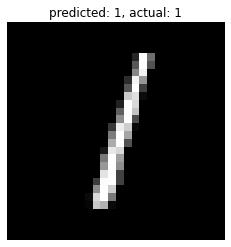

------------------------------------------------------------


In [ ]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_array, cmap="gray")
  plt.title(f"predicted: {pred}, actual: {actual}")
  plt.axis("off")
  plt.show()
  print("--"*30)

#Applying Transfer Learning

#New  Problem statement -

Classify handwritten digits into odd and even

In [ ]:
pretrained_model = tf.keras.models.load_model("mnist_full.h5")

In [ ]:
for layer in  pretrained_model.layers:
  print(f"{layer.name}: {layer.trainable}")

conv2d: True
max_pooling2d: True
conv2d_1: True
max_pooling2d_1: True
flatten: True
dense: True


In [ ]:
for layer in  pretrained_model.layers[:-1]: #leave the last layer
  layer.trainable=False

In [ ]:
for layer in  pretrained_model.layers:
  print(f"{layer.name}: {layer.trainable}")

conv2d: False
max_pooling2d: False
conv2d_1: False
max_pooling2d_1: False
flatten: False
dense: True


In [ ]:
lower_trained_model = pretrained_model.layers[:-1]

In [42]:
new_model=tf.keras.models.Sequential(lower_trained_model)

In [43]:
new_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [44]:
new_model.build(input_shape=(1,28,28,1))

In [45]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  320       
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense_3 (Dense)             (1, 2)                   

In [46]:
def update_even_odd_labels(labels):
  for idx, label in enumerate(labels):
    labels[idx] = np.where(label%2==0, 1, 0) # 1 -> even, 0 -> odd
  return labels

In [47]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [48]:
np.unique(y_train_bin)

array([0, 1])

In [49]:
new_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"])

In [50]:
history=new_model.fit(X_train, y_train_bin, epochs=10, validation_data=(X_valid,y_valid_bin))

Epoch 1/10
1719/1719 [==============================] - 17s 10ms/step - loss: 158.3907 - accuracy: 0.9275 - val_loss: 503.1235 - val_accuracy: 0.8152
Epoch 2/10
1719/1719 [==============================] - 16s 10ms/step - loss: 69.5210 - accuracy: 0.9549 - val_loss: 63.9991 - val_accuracy: 0.9570
Epoch 3/10
1719/1719 [==============================] - 17s 10ms/step - loss: 68.6131 - accuracy: 0.9583 - val_loss: 38.1720 - val_accuracy: 0.9712
Epoch 4/10
1719/1719 [==============================] - 24s 14ms/step - loss: 55.1927 - accuracy: 0.9620 - val_loss: 30.9100 - val_accuracy: 0.9758
Epoch 5/10
1719/1719 [==============================] - 21s 12ms/step - loss: 53.3170 - accuracy: 0.9645 - val_loss: 25.6823 - val_accuracy: 0.9780
Epoch 6/10
1719/1719 [==============================] - 19s 11ms/step - loss: 50.2334 - accuracy: 0.9658 - val_loss: 26.6660 - val_accuracy: 0.9762
Epoch 7/10
1719/1719 [==============================] - 17s 10ms/step - loss: 40.0339 - accuracy: 0.9683 - val

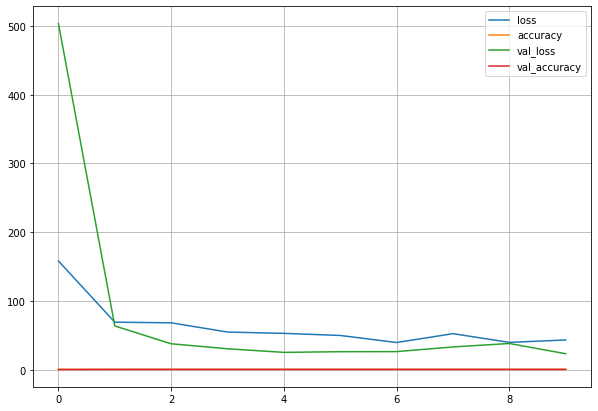

In [51]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [52]:
new_model.evaluate(X_test,y_test_bin)

313/313 [==============================] - 3s 9ms/step - loss: 21.0077 - accuracy: 0.9800


[21.007740020751953, 0.9800000190734863]

In [53]:
X_new = X_test[:3]

y_prob =new_model.predict(X_new)
y_prob

array([[1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [54]:
y_prob.round(3)

array([[1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [55]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([0, 1, 0])

In [56]:
y_test_bin[:3]

array([0, 1, 0])

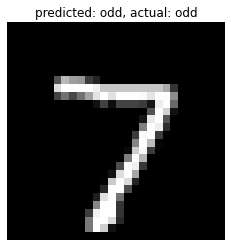

------------------------------------------------------------


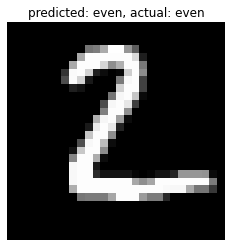

------------------------------------------------------------


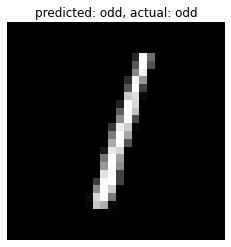

------------------------------------------------------------


In [57]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):
    if pred == 1:
        pred = "even"
    else:
        pred = "odd"

    if actual == 1:
        actual = "even"
    else:
        actual = "odd"
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)